In [2]:
import cv2
from matplotlib import pyplot as plt
from matplotlib import transforms
from matplotlib.patches import Rectangle
from time import time
from numpy import conj, real, argmax, unravel_index
import numpy as np
from numpy.fft import fft2, ifft2, conj

ImportError: cannot import name 'conj' from 'numpy.fft' (C:\Users\mariz\anaconda3\lib\site-packages\numpy\fft\__init__.py)

In [55]:
def FFT_1D(fx):
    fx = np.asarray(fx, dtype=complex)
    M = fx.shape[0]
    minDivideSize = 4

    if M <= minDivideSize:
        return DFT_1D(fx)
    else:
        fx_even = FFT_1D(fx[::2])
        fx_odd = FFT_1D(fx[1::2])
        W_ux_2k = np.exp(-2j * np.pi * np.arange(M) / M)

        f_u = fx_even + fx_odd * W_ux_2k[:M//2]

        f_u_plus_k = fx_even + fx_odd * W_ux_2k[M//2:]

        fu = np.concatenate([f_u, f_u_plus_k])

        return fu

In [31]:
def inverseFFT_1D(fu):
    fu = np.asarray(fu, dtype=complex)
    fu_conjugate = conj(fu)

    fx = FFT_1D(fu_conjugate)

    fx = conj(fx)
    fx = fx / fu.shape[0]

    return fx

In [32]:
def FFT_2D(fx):
    h, w = fx.shape[0], fx.shape[1]

    fu = np.zeros(fx.shape, dtype=complex)

    if len(fx.shape) == 2:
        for i in range(h):
            fu[i, :] = FFT_1D(fx[i, :])

        for i in range(w):
            fu[:, i] = FFT_1D(fu[:, i])

    return fu

In [60]:
def ifft2(fu):
    h, w = fu.shape[0], fu.shape[1]

    fx = np.zeros(fu.shape, dtype=complex)

    if len(fu.shape) == 2:
        for i in range(h):
            fx[i, :] = inverseDFT_1D(fu[i, :])

        for i in range(w):
            fx[:, i] = inverseDFT_1D(fx[:, i])

    fx = real(fx)
    return fx

In [43]:
def findpower2(num):
    bin_num = bin(num)
    origin_bin_num = str(bin_num)[2:]
    near_power2 = pow(10, len(origin_bin_num))
    near_power2 = "0b" + str(near_power2)
    near_power2 = int(near_power2, base=2)

    return near_power2

In [46]:
def image_padding(img):
    h, w = img.shape[0], img.shape[1]
    h_pad = findpower2(h)-h
    w_pad = findpower2(w)-w
    img = np.pad(img, pad_width=((0, h_pad), (0, w_pad)), mode='constant')
    return img

In [56]:
def fft2(img):
    img = image_padding(img)
    img_fft = FFT_2D(img)
    img_fft = img_fft[:img_origin.shape[0], :img_origin.shape[1]]
    
    return img_fft

In [6]:
def pattern_search(img, pattern):
    Ga = fft2(img)
    Gb = fft2(pattern, s=(img.shape[0], img.shape[1]))
    c = real(ifft2(Ga * conj(Gb) / abs(Ga * conj(Gb))))
    return c

In [7]:
def max_info(c):
    ind = unravel_index(argmax(c), c.shape)
    return ind[0], ind[1], c.max()

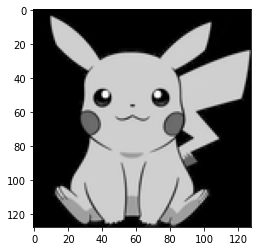

In [8]:
pattern = cv2.imread('img/pikachu.png', 0)
plt.imshow(cv2.cvtColor(pattern, cv2.COLOR_BGR2RGB))

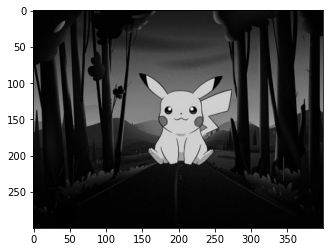

In [9]:
img = cv2.imread('img/img1.jpg', 0)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

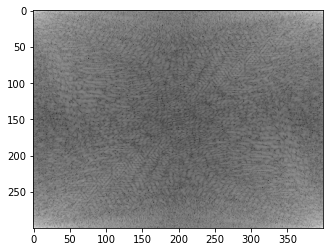

In [58]:
Ga = fft2(img)
plt.imshow(np.log(1 + np.abs(Ga)), 'gray')

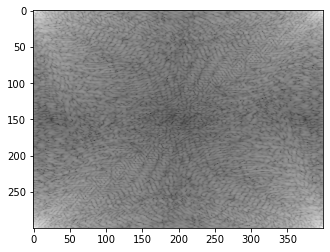

In [59]:
Gb = fft2(pattern, s=(img.shape[0], img.shape[1]))
plt.imshow(np.log(1 + np.abs(Gb)), 'gray')

In [64]:
c = pattern_search(img, pattern)
xpeak, ypeak, c_max = max_info(c)
xpeak, ypeak, c_max

(86, 146, 0.7115512996688067)

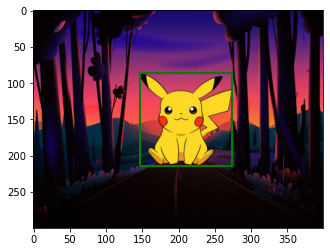

In [65]:
img1 = cv2.imread('img/img1.jpg')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

ax = plt.gca()
rect = Rectangle((ypeak, xpeak), pattern.shape[0], pattern.shape[1], linewidth=2, edgecolor='g', facecolor='none')
ax.add_patch(rect)

In [66]:
def scale(img, pattern):
    px, py = pattern.shape
    scales = [10 + 5 * i for i in range(19)]
    res = {}
    rs, c_max, xpeak, ypeak = 0, 0, 0, 0
    
    for s in scales:
        resized_pattern = cv2.resize(pattern, (int(s * px / 100), int(s * py / 100)))
        c = pattern_search(img, resized_pattern)
        yp, xp, cm = max_info(c)
        res[s] = cm
        
        if cm > c_max:
            rs, c_max, xpeak, ypeak = s, cm, xp, yp
    
    return res, rs, xpeak, ypeak

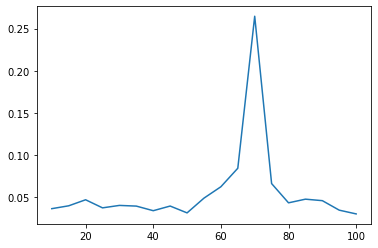

In [67]:
img = cv2.imread('img/img1 70%.jpg', 0)
res, s, ind0, ind1 = scale(img, pattern)
plt.plot(res.keys(), res.values())

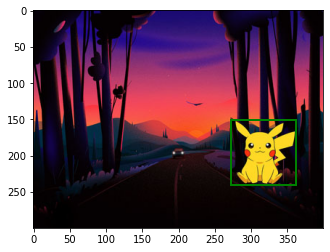

In [68]:
img1 = cv2.imread('img/img1 70%.jpg')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

ax = plt.gca()
rect = Rectangle((ind0, ind1), pattern.shape[0] * s / 100, pattern.shape[1] * s / 100, linewidth=2, edgecolor='g', facecolor='none')
ax.add_patch(rect)

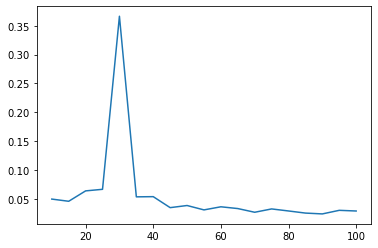

In [69]:
img = cv2.imread('img/img1 30%.jpg', 0)
res, s, ind0, ind1 = scale(img, pattern)
plt.plot(res.keys(), res.values())

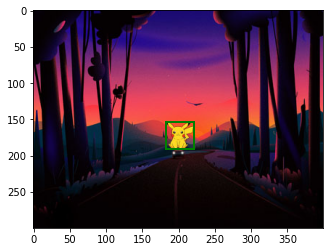

In [70]:
img1 = cv2.imread('img/img1 30%.jpg')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

ax = plt.gca()
rect = Rectangle((ind0, ind1), pattern.shape[0] * s / 100, pattern.shape[1] * s / 100, linewidth=2, edgecolor='g', facecolor='none')
ax.add_patch(rect)

In [71]:
def rotate(img, pattern):
    px, py = pattern.shape
    angles = [10 * i for i in range(37)]
    res = {}
    rs, c_max, xpeak, ypeak = 0, 0, 0, 0
    
    for a in angles:
        M = cv2.getRotationMatrix2D((px / 2, py / 2), a, 1)
        rotated_pattern = cv2.warpAffine(pattern, M, (px, py))
        
        c = pattern_search(img, rotated_pattern)
        yp, xp, cm = max_info(c)
        res[a] = cm
        
        if cm > c_max:
            rs, c_max, xpeak, ypeak = a, cm, xp, yp
    
    return res, rs, xpeak, ypeak

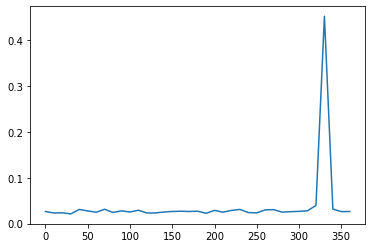

In [72]:
img = cv2.imread("img/img1 30'.jpg", 0)
res, a, ind0, ind1 = rotate(img, pattern)
plt.plot(res.keys(), res.values())

In [84]:
ind0, ind1, a

(125, 59, 330)

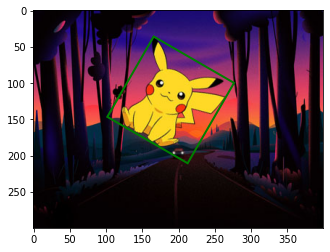

In [85]:
img1 = cv2.imread("img/img1 30'.jpg")
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

px, py = pattern.shape
ax = plt.gca()
rect = Rectangle((ind0, ind1), px, py, linewidth=2, edgecolor='g', facecolor='none')
t = transforms.Affine2D().rotate_deg_around(ind0 + px / 2, ind1 + py / 2, -a) + ax.transData
rect.set_transform(t)

ax.add_patch(rect)

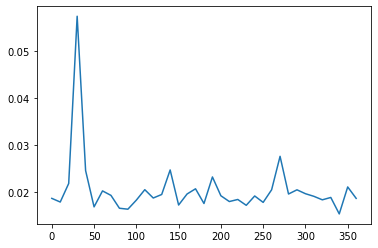

In [87]:
img = cv2.imread("img/img2 -33'.jpg", 0)
res, a, ind0, ind1 = rotate(img, pattern)
plt.plot(res.keys(), res.values())

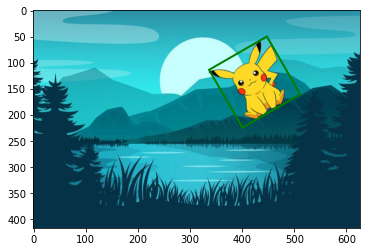

In [88]:
img1 = cv2.imread("img/img2 -33'.jpg")
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

px, py = pattern.shape
ax = plt.gca()
rect = Rectangle((ind0, ind1), px, py, linewidth=2, edgecolor='g', facecolor='none')
t = transforms.Affine2D().rotate_deg_around(ind0 + px / 2, ind1 + py / 2, -a) + ax.transData
rect.set_transform(t)

ax.add_patch(rect)

In [90]:
def scale_rotate(img, pattern):
    px, py = pattern.shape
    angles = [10 * i for i in range(37)]
    scales = [10 + 5 * i for i in range(19)]
    res = [[], [], []]
    rs, ra, c_max, xpeak, ypeak = 0, 0, 0, 0, 0
    
    for s in scales:
        for a in angles:
            M = cv2.getRotationMatrix2D((px / 2, py / 2), a, 1)
            rotated_pattern = cv2.warpAffine(pattern, M, (px, py))
            rr_pattern = cv2.resize(rotated_pattern, (int(s * px / 100), int(s * py / 100)))
            c = pattern_search(img, rr_pattern)
            yp, xp, cm = max_info(c)
            
            res[0].append(s)
            res[1].append(a)
            res[2].append(cm)

            if cm > c_max:
                rs, ra, c_max, xpeak, ypeak = s, a, cm, xp, yp
    
    return res, rs, ra, xpeak, ypeak

In [96]:
img = cv2.imread("img/img2 50% 180'.jpg", 0)
res, s, a, ind0, ind1 = scale_rotate(img, pattern)

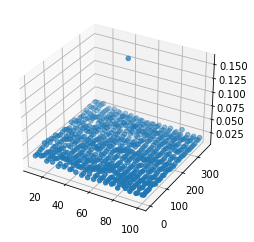

In [109]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.scatter(res[0], res[1], res[2])

In [112]:
ind0, ind1, s, a

(141, 32, 50, 270)

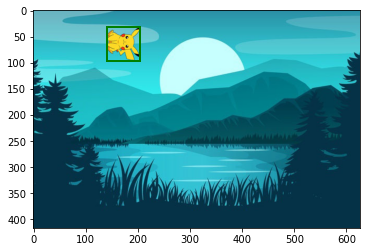

In [113]:
img1 = cv2.imread("img/img2 50% 180'.jpg")
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

px, py = pattern.shape[0] * s / 100, pattern.shape[1] * s / 100
ax = plt.gca()
rect = Rectangle((ind0, ind1), px, py, linewidth=2, edgecolor='g', facecolor='none')
t = transforms.Affine2D().rotate_deg_around(ind0 + px / 2, ind1 + py / 2, -a) + ax.transData
rect.set_transform(t)

ax.add_patch(rect)